In [4]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#import seaborn as sns; sns.set()  # for plot styling
from sklearn.mixture import GaussianMixture


In [5]:
raw_data = pd.read_json("../data/monthly_json.json") 

In [3]:
raw_data.head()

,Date,Mean,Source
0,2016-12-06,0.7895,GCAG
1,2016-12-06,0.8100,GISTEMP
2,2016-11-06,0.7504,GCAG
3,2016-11-06,0.9300,GISTEMP
4,2016-10-06,0.7292,GCAG


In [51]:
data = raw_data.pivot(index='Date', columns='Source', values='Mean')

In [52]:
data.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


In [53]:
gcag = data.loc[:,'GCAG']
gistemp = data.loc[:,'GISTEMP']

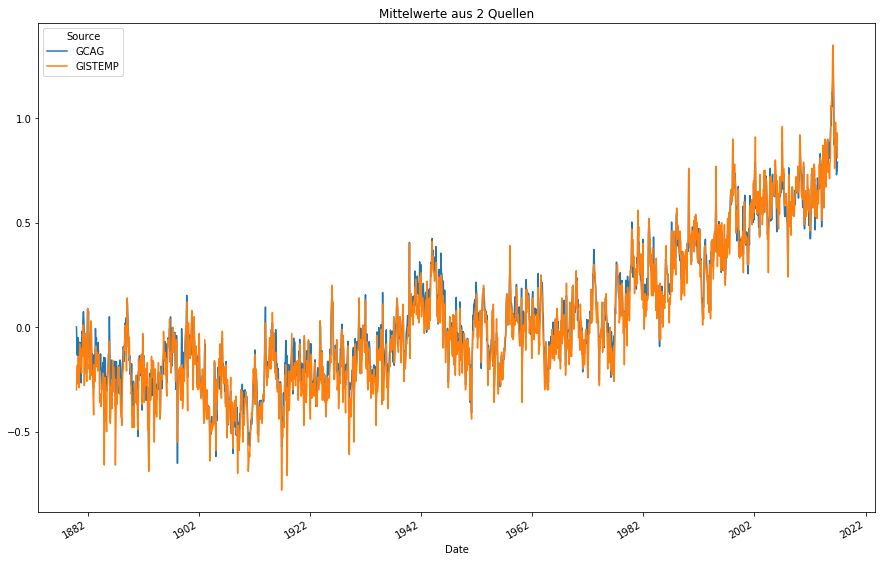

In [54]:
data.plot(figsize = (15,10),title = 'Mittelwerte aus 2 Quellen');

<function matplotlib.pyplot.show(*args, **kw)>

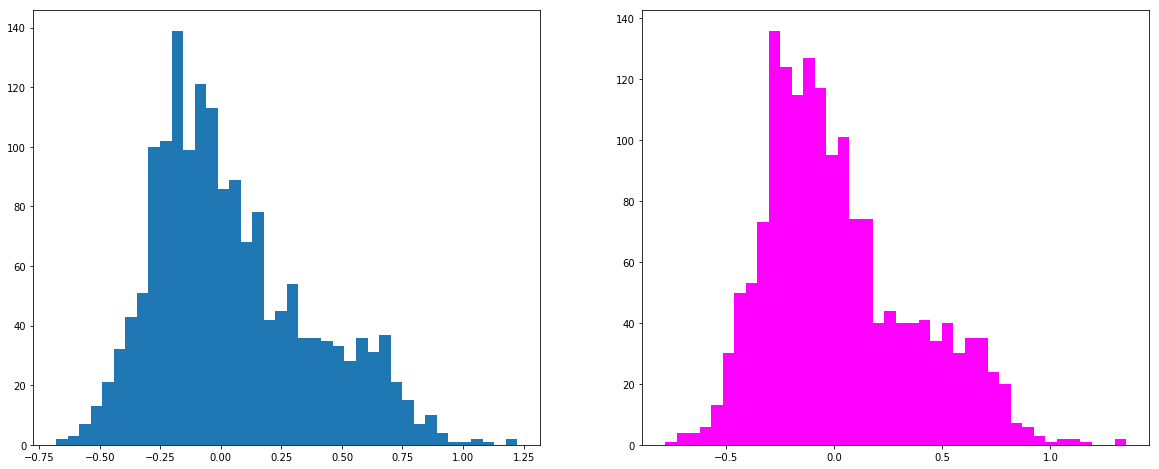

In [55]:
#plt.hist(data.loc[:,'GCAG'], histtype = 'step', bins =100);

plt.figure(1, figsize=(20, 8));
plt.subplot(121)
plt.hist(data.loc[:,'GCAG'], bins=40)

plt.subplot(122)
plt.hist(data.loc[:,'GISTEMP'], bins=40, color='magenta')
plt.show

In [56]:
print('Korrelation zwischen den beiden Messstellen: ',np.round(np.corrcoef(np.array(data), rowvar=False)[0,1],4))

Korrelation zwischen den beiden Messstellen:  0.9851


## Clustering

### K-Means

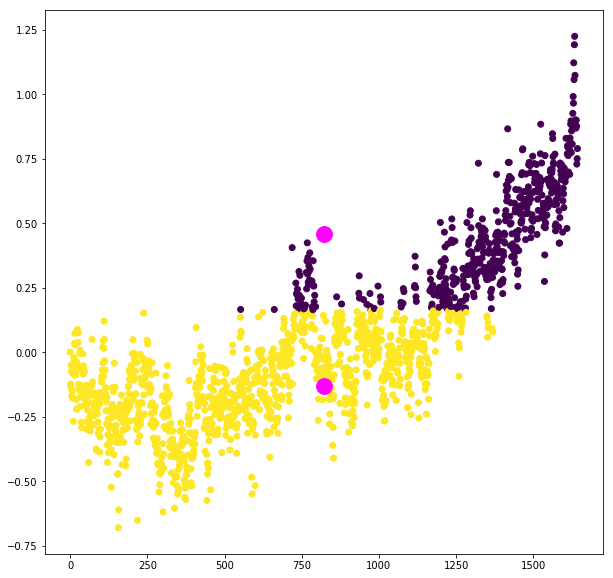

Größe Cluster 0 : 502
Größe Cluster 1 : 1142


In [57]:
anzahl_cluster = 2
x = np.array(list(range(0,1644)))
kmeans = KMeans(n_clusters=anzahl_cluster, random_state=0).fit(data['GCAG'].values.reshape(-1, 1))
cluster1 = kmeans.predict(data['GCAG'].values.reshape(-1, 1))

#Plot using scatter
plt.figure(1,figsize=(10,10))
plt.scatter(x,data['GCAG'], c=cluster1)
# plt.scatter(x,data['GISTEMP'], c=cluster)
centers = kmeans.cluster_centers_
plt.scatter(822, centers[0], c='magenta', s=250);
plt.scatter(822, centers[1], c='magenta', s=250);

plt.show();
for i in range(0, anzahl_cluster):
    print('Größe Cluster',i,':', len(cluster1[cluster1 == i]))

#print(centers)

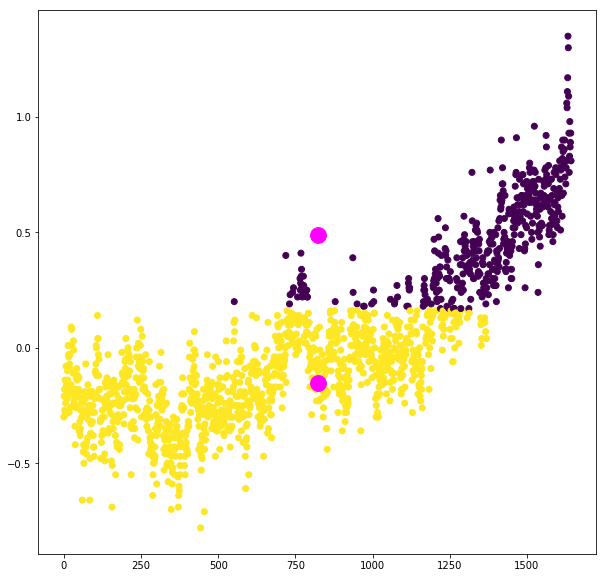

Größe Cluster 0 : 455
Größe Cluster 1 : 1189


In [58]:
anzahl_cluster = 2
x = np.array(list(range(0,1644)))
kmeans = KMeans(n_clusters=anzahl_cluster, random_state=0).fit(data['GISTEMP'].values.reshape(-1, 1))
cluster2 = kmeans.predict(data['GISTEMP'].values.reshape(-1, 1))

#Plot using scatter
plt.figure(1,figsize=(10,10))
plt.scatter(x,data['GISTEMP'], c=cluster2)
# plt.scatter(x,data['GISTEMP'], c=cluster)
centers = kmeans.cluster_centers_
plt.scatter(822, centers[0], c='magenta', s=250);
plt.scatter(822, centers[1], c='magenta', s=250);

plt.show();
for i in range(0, anzahl_cluster):
    print('Größe Cluster',i,':', len(cluster2[cluster2 == i]))
    

In [59]:
for i in range(-1,2):
    print(sum(((cluster1 - cluster2) == i)== True)) 


55
1581
8


### GMM

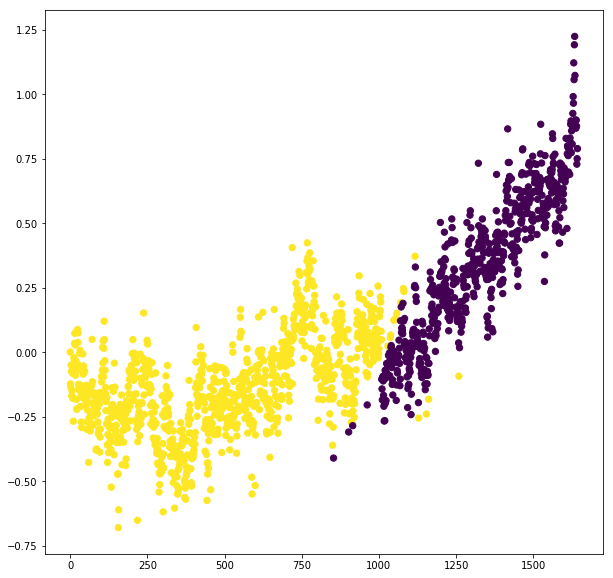

Größe Cluster 0 : 625
Größe Cluster 1 : 1019


In [60]:
from sklearn.mixture import GaussianMixture
matrix = np.zeros((1644,2))
matrix[:,0] = x
matrix[:,1] = q = data['GCAG'].values
gmm = GaussianMixture(n_components=2).fit(matrix)
cluster3 = labels = gmm.predict(matrix)
plt.figure(1,figsize=(10,10));
plt.scatter(matrix[:, 0], matrix[:, 1], c=labels, s=40, cmap='viridis');
plt.show();

for i in range(0, anzahl_cluster):
    print('Größe Cluster',i,':', len(cluster3[cluster3 == i]))

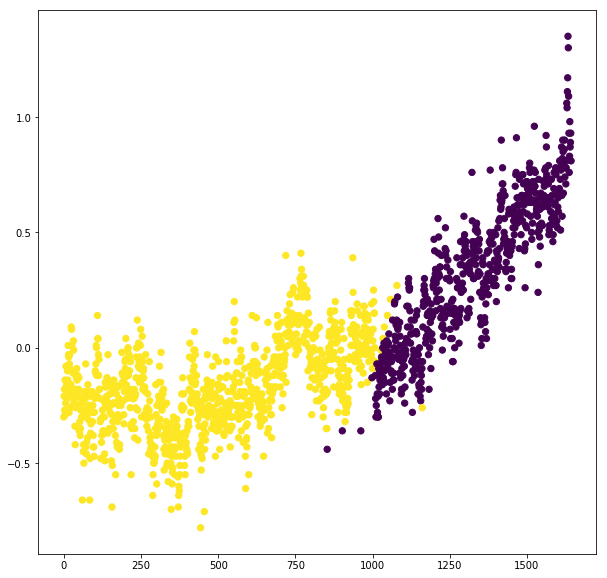

Größe Cluster 0 : 631
Größe Cluster 1 : 1013


In [61]:
from sklearn.mixture import GaussianMixture

matrix[:,0] = x
matrix[:,1] = q = data['GISTEMP'].values
gmm = GaussianMixture(n_components=2).fit(matrix)
cluster4 = labels = gmm.predict(matrix)
plt.figure(1,figsize=(10,10));
plt.scatter(matrix[:, 0], matrix[:, 1], c=labels, s=40, cmap='viridis');
plt.show();

for i in range(0, anzahl_cluster):
    print('Größe Cluster',i,':', len(cluster4[cluster4 == i]))

In [64]:
clustering = pd.DataFrame(cluster1, columns=['K-Means, GCAC'])
clustering['K-Means, GISTEMP'] = cluster2
clustering['GMM, GCAC'] = cluster3
clustering['GMM, GISTEMP'] = cluster4
# clustering[clustering.iloc[:,0] != clustering.iloc[:,1]]
print('Vergleich der Datensätze, für Verfahren K-Means:')
print(len(clustering[clustering.iloc[:,0] != clustering.iloc[:,1]]))
print('Vergleich der Datensätze, für Verfahren Gaussian:')
print(len(clustering[clustering.iloc[:,2] != clustering.iloc[:,3]]))
#print(clustering[clustering.iloc[:,2] != clustering.iloc[:,3]])
print('Vergleich der Verfahren, für Datensatz GCAG:')
print(len(clustering[clustering.iloc[:,0] != clustering.iloc[:,2]]))
print('Vergleich der Verfahren, für Datensatz GISTEMP:')
print(len(clustering[clustering.iloc[:,1] != clustering.iloc[:,3]]))

#print(clustering)

Vergleich der Datensätze, für Verfahren K-Means:
63
Vergleich der Datensätze, für Verfahren Gaussian:
14
Vergleich der Verfahren, für Datensatz GCAG:
247
Vergleich der Verfahren, für Datensatz GISTEMP:
246


# ???

# - - - - - - - - - 
# Trash: